# 얼굴 모자이크 처리

In [1]:
import face_recognition
import cv2

# This is a demo of blurring faces in video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Initialize some variables
face_locations = []

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Resize frame of video to 1/4 size for faster face detection processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(small_frame, model="cnn")

    # Display the results
    for top, right, bottom, left in face_locations:
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Extract the region of the image that contains the face
        face_image = frame[top:bottom, left:right]

        # Blur the face image
        face_image = cv2.GaussianBlur(face_image, (99, 99), 30)

        # Put the blurred face region back into the frame image
        frame[top:bottom, left:right] = face_image

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

# 실행화면

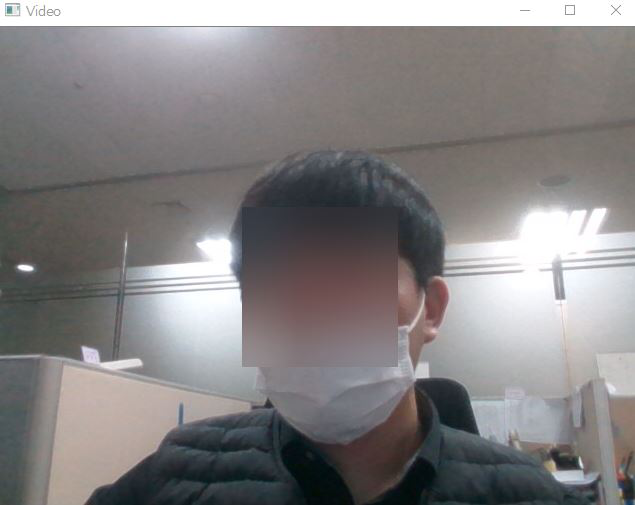

In [2]:
from PIL import Image

image01 = Image.open("result.jpg")

image01